# Laboratorio 2 - Series de tiempo
## Precios promedio

##### Sebastian Aristondo 20880
##### Daniel Gonzalez 20293

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

## 1. Análisis expolatorio

### 1.1 Consumo de combustibles

In [ ]:
consumo = pd.read_csv('Precios_promedio.csv', sep=',')
consumo.head()

In [ ]:
columns_to_convert = [col for col in consumo.columns if col != 'FECHA']
consumo[columns_to_convert] = consumo[columns_to_convert].apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)\

consumo.describe()

In [ ]:
consumo['FECHA'] = pd.to_datetime(consumo['FECHA'], format='%d/%b/%Y')
consumo.dtypes

In [ ]:
consumo["Diesel_conjunto"] = consumo["Diesel alto azufre"] + consumo["Diesel bajo azufre"]
consumo["Diesel_conjunto"] = consumo["Diesel_conjunto"].fillna(0)
consumo["Diesel_conjunto"] = consumo["Diesel_conjunto"].astype(float)
consumo.dropna(subset=["Diesel_conjunto"], inplace=True)

nans_por_columna = consumo.isna().sum()

print("Valores NaN por columna:")
print(nans_por_columna)

In [ ]:
columnas_interes = ["Gasolina regular", "Gasolina superior", "Diesel_conjunto", "Gas licuado de petróleo"]
consumo_numericas = consumo[columnas_interes]

correlation_matrix = consumo_numericas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación')
plt.show()

In [ ]:
grid = sns.pairplot(consumo_numericas)
plt.show()

In [ ]:
normality_test = consumo_numericas.apply(normaltest)
print("Resultados de test de normalidad: \n", normality_test)

Ninguna de las distribuciones de las variables interesantes es normal.

In [110]:
consumo["Mes"] = consumo["Fecha"].dt.month
consumo["Año"] = consumo["Fecha"].dt.year

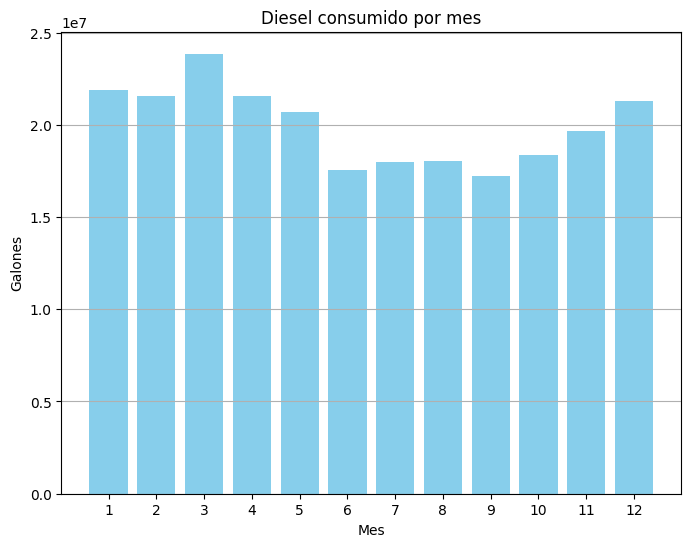

In [111]:
suma_por_mes = consumo.groupby('Mes')['Diesel_conjunto'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Diesel consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

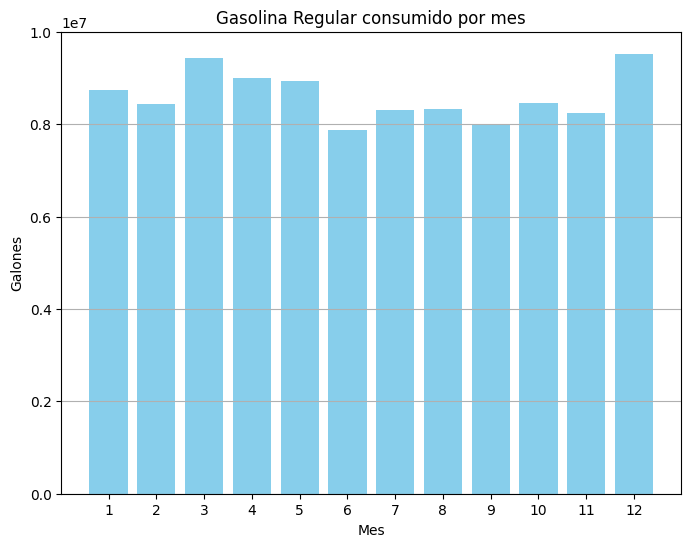

In [112]:
suma_por_mes = consumo.groupby('Mes')['Gasolina regular'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gasolina Regular consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

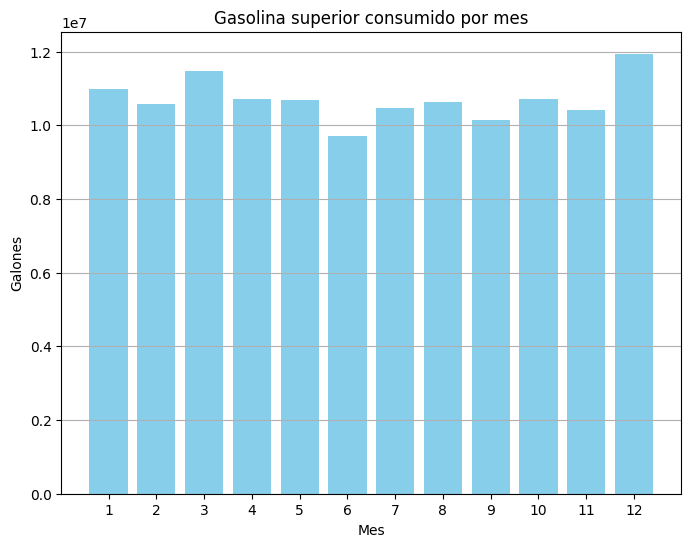

In [113]:
suma_por_mes = consumo.groupby('Mes')['Gasolina superior'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gasolina superior consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

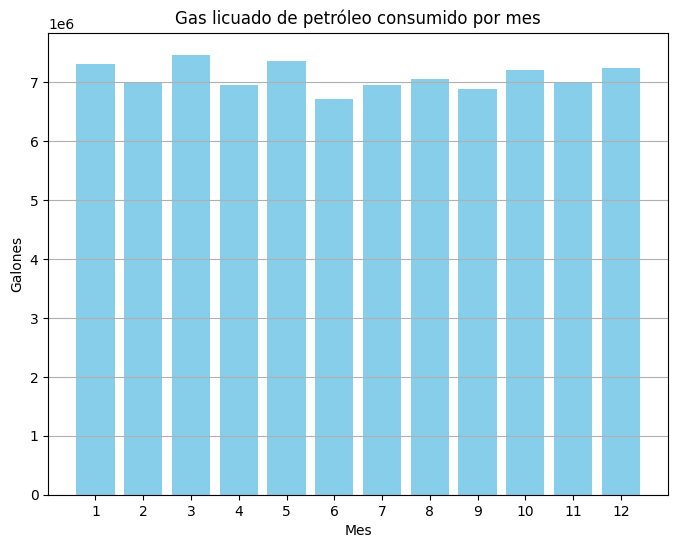

In [114]:
suma_por_mes = consumo.groupby('Mes')['Gas licuado de petróleo'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gas licuado de petróleo consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

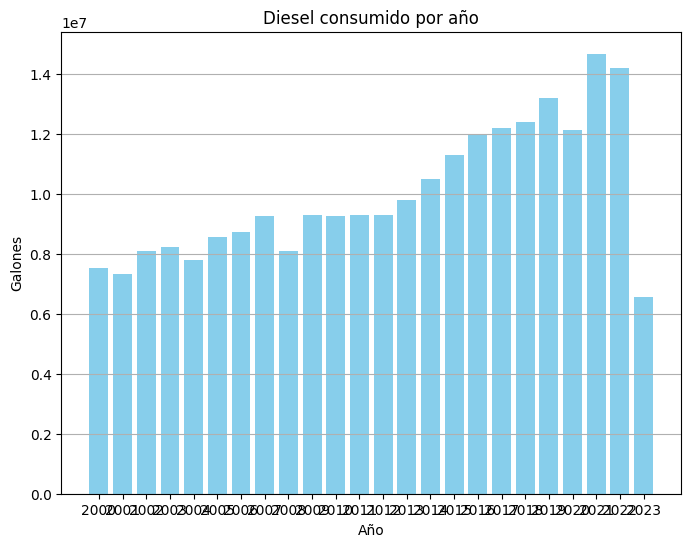

In [115]:
suma_por_mes = consumo.groupby('Año')['Diesel_conjunto'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Diesel consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

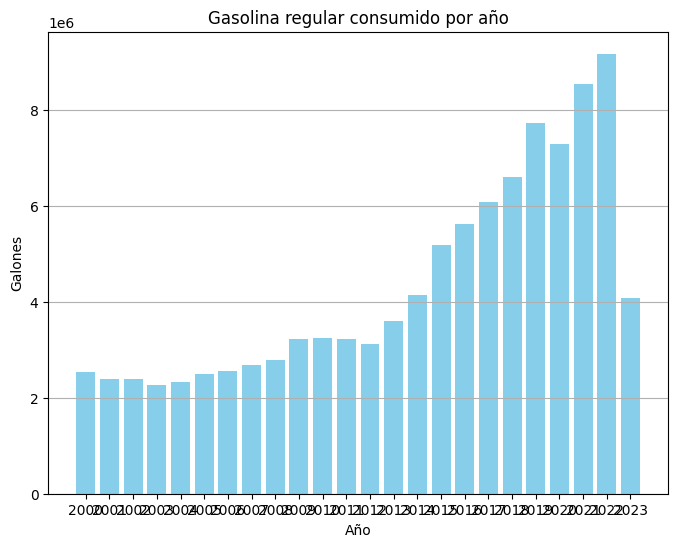

In [116]:
suma_por_mes = consumo.groupby('Año')['Gasolina regular'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Gasolina regular consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

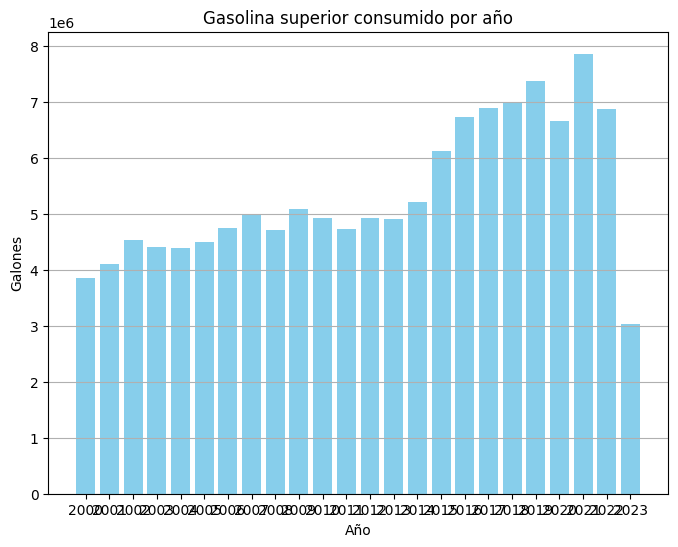

In [117]:
suma_por_mes = consumo.groupby('Año')['Gasolina superior'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Gasolina superior consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

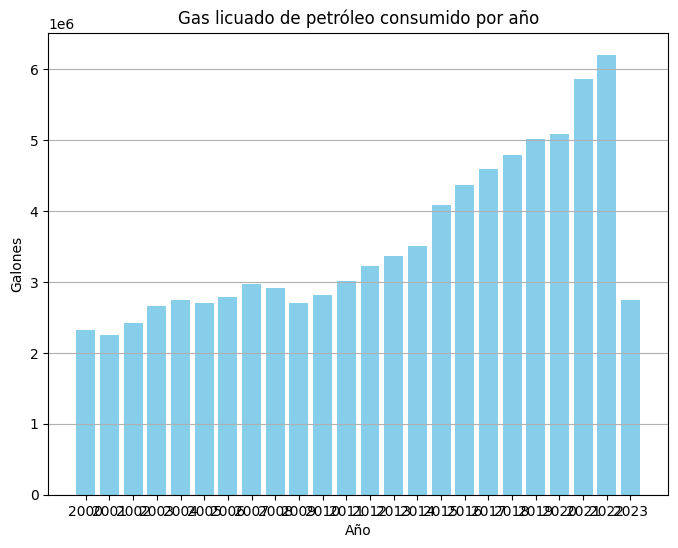

In [118]:
suma_por_mes = consumo.groupby('Año')['Gas licuado de petróleo'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Gas licuado de petróleo consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

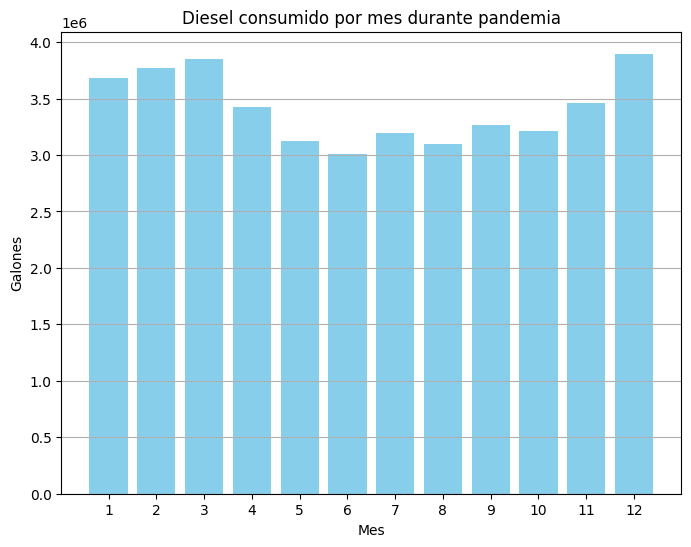

In [119]:
datos_pandemia = consumo[(consumo["Fecha"].dt.year >= 2020) & (consumo["Fecha"].dt.year <= 2022)]
suma_por_mes = datos_pandemia.groupby('Mes')['Diesel_conjunto'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Diesel consumido por mes durante pandemia')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

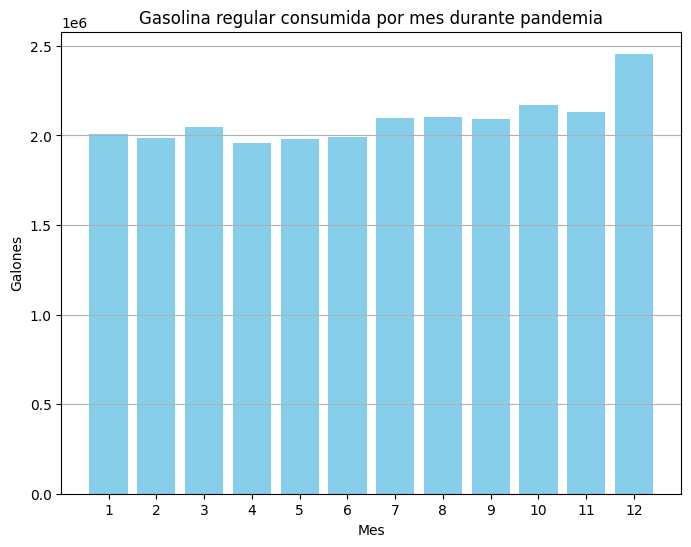

In [120]:
suma_por_mes = datos_pandemia.groupby('Mes')['Gasolina regular'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gasolina regular consumida por mes durante pandemia')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

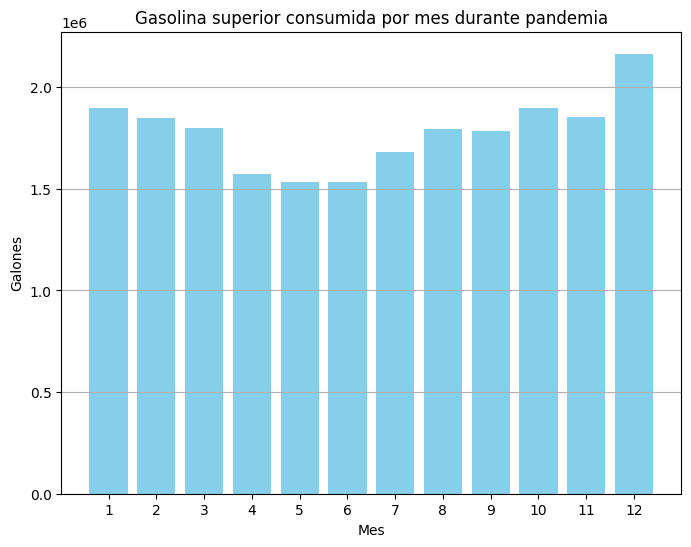

In [121]:
datos_pandemia = consumo[(consumo["Fecha"].dt.year >= 2020) & (consumo["Fecha"].dt.year <= 2022)]
suma_por_mes = datos_pandemia.groupby('Mes')['Gasolina superior'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gasolina superior consumida por mes durante pandemia')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

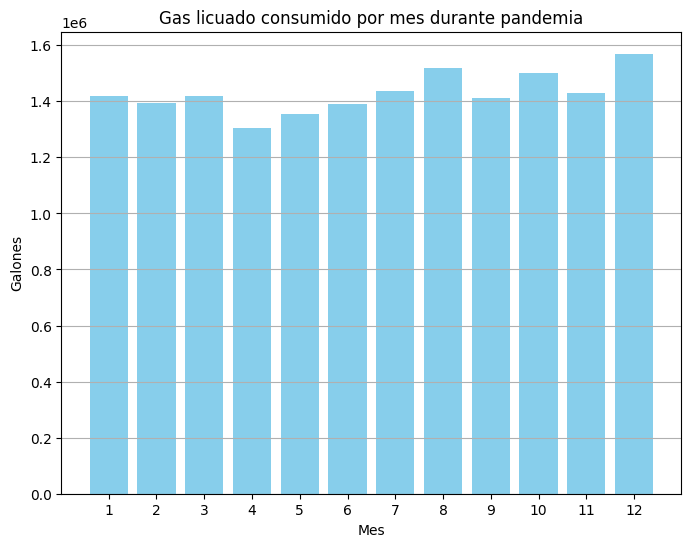

In [122]:
datos_pandemia = consumo[(consumo["Fecha"].dt.year >= 2020) & (consumo["Fecha"].dt.year <= 2022)]
suma_por_mes = datos_pandemia.groupby('Mes')['Gas licuado de petróleo'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gas licuado consumido por mes durante pandemia')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

### 1.2 Importación de combustibles

### 1.3 Precio en Ciudad Capital

## 2. Elección de series de tiempo

* Serie 1: Consumo de diesel
* Serie 2: Importacion de gasolina regular
* Serie 3: Precio de gasolina super

## 3. Análisis de series de tiempo

### 3.1 Consumo de diesel

#### a. Especifique Inicio, fin, y frecuencia.

In [123]:
print("Inicio de frecuencia: ", min(consumo["Fecha"]))
print("Fin de frecuencia: ", max(consumo["Fecha"]))
print("La frecuencia es mensual")

Inicio de frecuencia:  2000-01-01 00:00:00
Fin de frecuencia:  2023-05-01 00:00:00
La frecuencia es mensual


#### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.

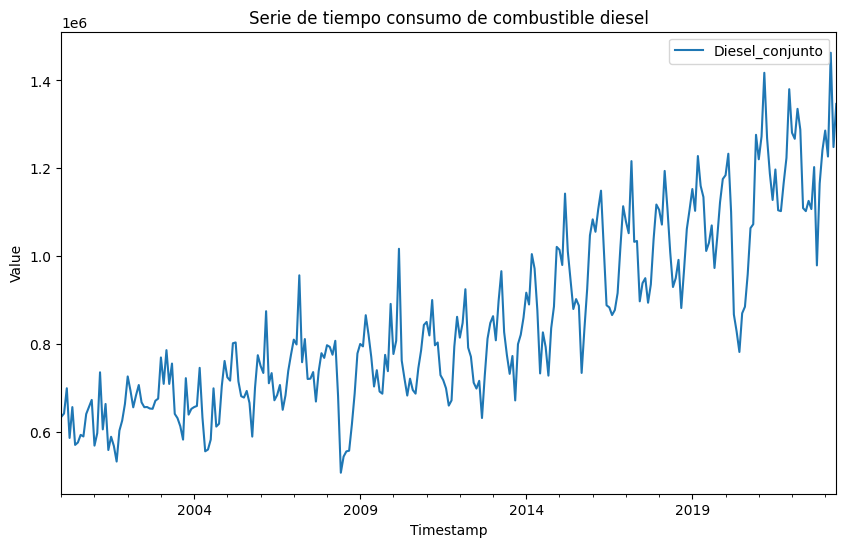

In [124]:
consumo_diesel = consumo[["Fecha", "Diesel_conjunto"]].copy()
# consumo_diesel = consumo_diesel[consumo_diesel["Fecha"].dt.year >= 2020]
consumo_diesel["Fecha"] = pd.to_datetime(consumo_diesel["Fecha"])
consumo_diesel = consumo_diesel.set_index("Fecha")
consumo_diesel.plot(figsize=(10, 6))
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Serie de tiempo consumo de combustible diesel')
plt.show()

A primera vista se puede observar que existe una tendencia a la alza en la serie de tiempo de consumo de combustible. Se puede observar una caída cerca de 2020, lo cual podría corresponder a la pandemia y luego sube al máximo consumo en toda la serie.

#### c. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.

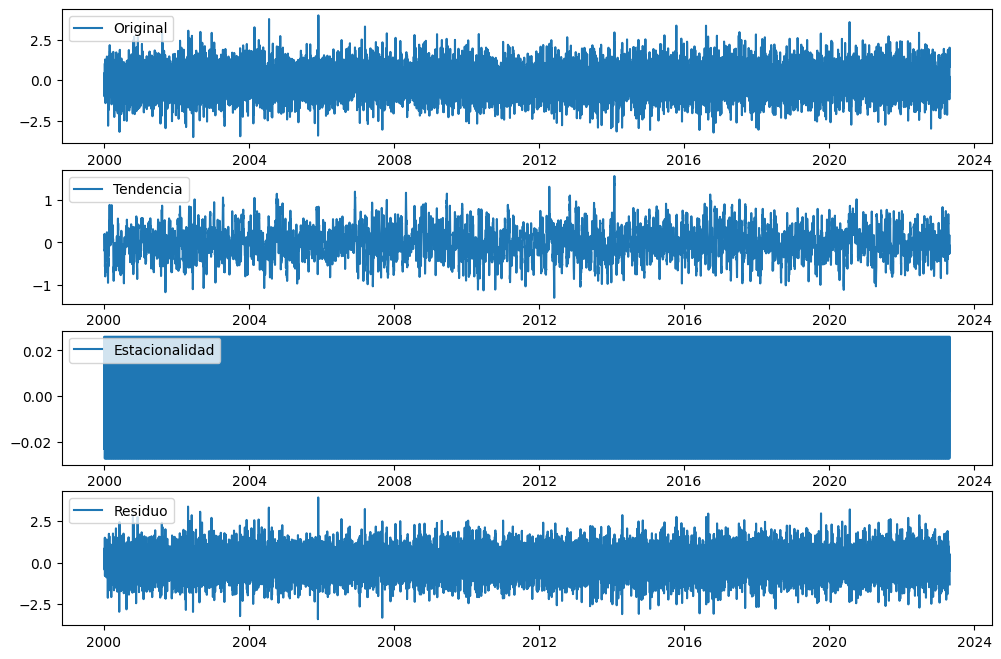

In [125]:
# Crear un índice de fechas para la serie temporal (puedes omitir esta parte si ya tienes un DataFrame con fechas como índice)
date_rng = pd.date_range(start=min(consumo_diesel.index), end=max(consumo_diesel.index), freq='D')
values = np.random.randn(len(date_rng))  # Valores aleatorios para el ejemplo

# Crear el DataFrame con la serie temporal
ts_df = pd.DataFrame(values, index=date_rng, columns=['Value'])

# Realizar la descomposición
result = seasonal_decompose(ts_df['Value'], model='additive', period=7)  # Puedes cambiar 'additive' a 'multiplicative' según la naturaleza de la estacionalidad

# Visualizar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(ts_df['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuo')
plt.legend(loc='upper left')
plt.show()

Al graficar la serie de tiempo para el consumo de diesel en Guatemala, se puede observar que existe una tendencia a la alza. Esto puede indicar que no existe estacionariedad en media. También se observa que la varianza no es constante, por lo que igualmente es posible que no exista estacionariedad en varianza. No se puede observar por la cantidad de datos, pero es posible que exista estacionalidad. Se realizará la prueba de Dickey Fuller para confirmar si existe estacionariedad en media.

#### d. Determine si es necesario transformar la serie. Explique.

Se aplicará boxcox a la serie para poder hacerla estacionaria en varianza. Como se mencionó, se puede observar en la serie de tiempo diferencias entre las varianzas.

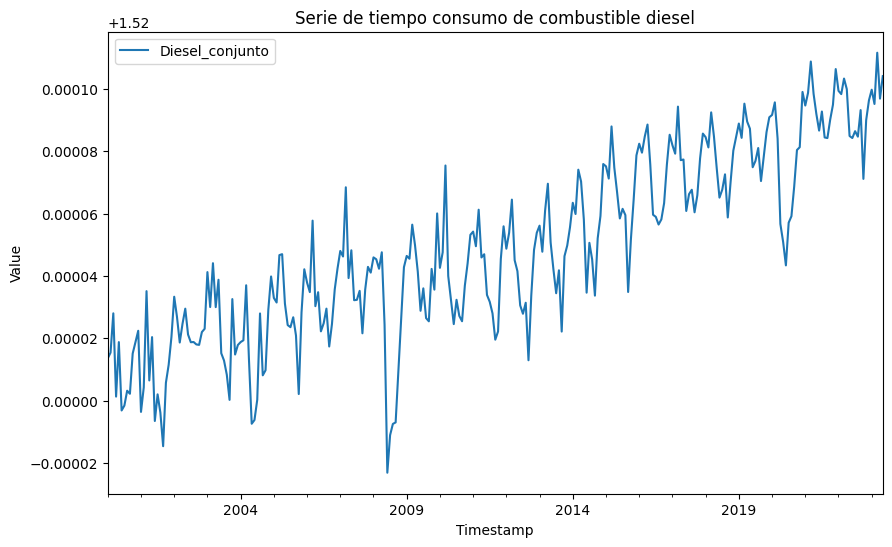

In [126]:
transformed_values, lambda_value = boxcox(consumo_diesel['Diesel_conjunto'])
consumo_diesel['Diesel_conjunto'] = transformed_values
consumo_diesel.plot(figsize=(10, 6))
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Serie de tiempo consumo de combustible diesel')
plt.show()


#### d. Explique si no es estacionaria en media. Para esto:

##### i. Haga el gráfico de autocorrelación y úselo para explicar la no estacionariedad en media.

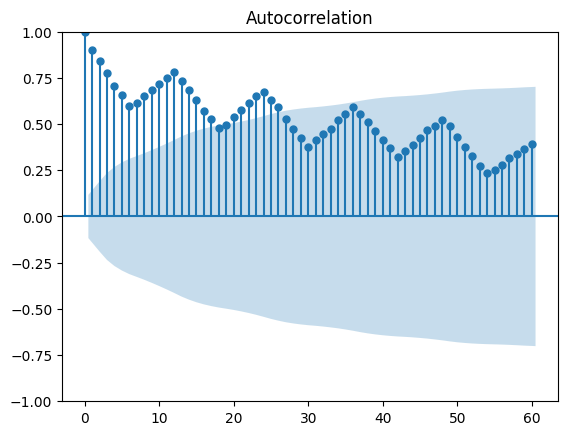

In [135]:
fig = plot_acf(consumo_diesel['Diesel_conjunto'], lags=60)
plt.show()

Se puede observar que los valores de la autocorrelación no decrecen rápidamente a 0. Esto indica que el proceso no es estacionario, porque existe una tendencia en la media.

##### ii. Básese en los valores de estadísticos como la prueba de Dickey-Fuller Aumentada para corroborar la no estacionariedad en media. ¿Qué es necesario hacer para hacerla estacionaria en media en caso de que no lo sea?

In [138]:
def check_stationarity(timeseries):
    # Realizar la prueba ADF
    resultado_adf = adfuller(consumo_diesel)

    # Extraer los resultados importantes de la prueba
    adf_stat = resultado_adf[0]
    p_valor = resultado_adf[1]
    valores_criticos = resultado_adf[4]

    # Imprimir los resultados
    print("Estadístico ADF:", adf_stat)
    print("P-valor:", p_valor)
    print("Valores críticos:")
    for key, value in valores_criticos.items():
        print(f"  {key}: {value}")
check_stationarity(consumo_diesel)

Estadístico ADF: -0.82824075615043
P-valor: 0.8106855004860194
Valores críticos:
  1%: -3.454988209954765
  5%: -2.8723857312734613
  10%: -2.572549407997327


Por medio de ADF se puede observar que la serie no es estacionaria, por lo que se procede a diferenciarla.